In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
import random
warnings.filterwarnings("ignore")

In [75]:
def fill_with_mode(column = None):
    """
    Função para escolher a moda de uma série de dados.
    """
    fill_column = column.copy()
    modas = column.mode()
    if len(modas) == 1:
        fill_column = fill_column.fillna(modas[0])
        return fill_column
    
    fill_column = fill_column.fillna(random.choice(modas))
    return fill_column

In [76]:
def calculate_outliers(df = None):
    """
    Função para calcular os outliers de um dataframe.
    """
    if df is None:
        raise ValueError("O dataframe não pode ser None.")
    if not isinstance(df, pd.DataFrame):
        raise TypeError("O argumento df deve ser um dataframe do pandas.")
    
    numerical_columns = df.select_dtypes(include=['int','float']).columns.tolist()
    outliers = []

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        mask = (df[column] < lower_limit) | (df[column] > upper_limit)
        qtd_outliers = mask.sum()
        percentage_outliers = (qtd_outliers / df[column].size) * 100
        outliers.append({
            'Column': column,
            'Qtd_outliers': qtd_outliers,
            'Percentage_outliers': percentage_outliers,
        })

    return pd.DataFrame(outliers)

In [77]:
filename = '../../dataset/crash_data.csv'
images_path = 'data_visualization/'
df = pd.read_csv(filename, low_memory=False)

In [78]:
df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Bus Involvement                  object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
Road User                        object
Gender                           object
Age                               int64
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Age Group                        object
Day of week                      object
Time of day                      object
dtype: object

In [79]:
df['Speed Limit'] = df['Speed Limit'].replace(['-9', -9, '', ' '], np.nan)
# Converte para numérico, forçando erro para NaN
df['Speed Limit'] = pd.to_numeric(df['Speed Limit'], errors='coerce')


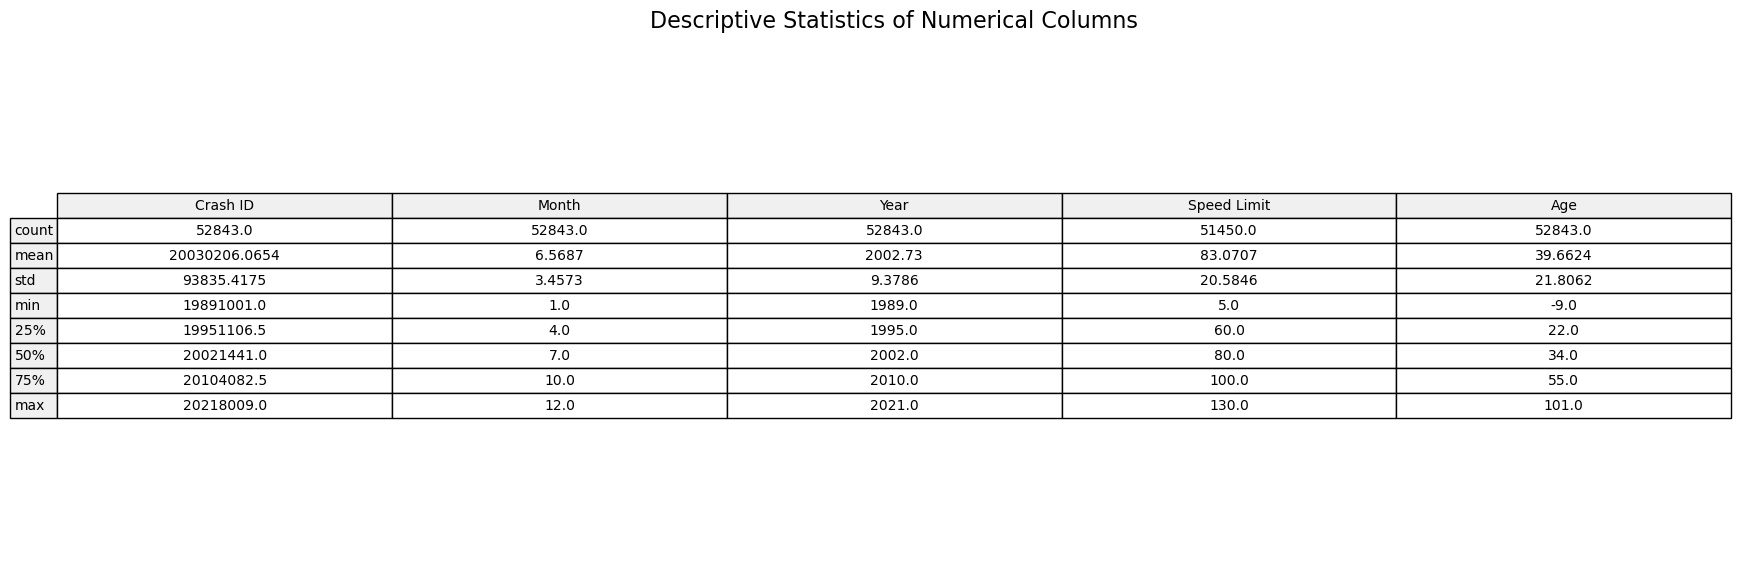

In [80]:

numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categoric_columns = df.select_dtypes(include=['object']).columns.tolist()

df_numerical = df[numerical_columns]
df_categoric = df[categoric_columns]

df_numerical_descrition = df_numerical.describe()

fig, ax = plt.subplots(figsize=(18,7))
ax.axis('off')
table = ax.table(
    cellText=df_numerical_descrition.values.round(4),
    colLabels=df_numerical_descrition.columns,
    rowLabels=df_numerical_descrition.index,
    cellLoc='center',
    loc='center',
    colColours=['#f0f0f0'] * len(df_numerical_descrition.columns),
    rowColours=['#f0f0f0'] * len(df_numerical_descrition.index)
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Descriptive Statistics of Numerical Columns", fontsize=16)
plt.show()

In [81]:
null_summary = pd.DataFrame({
    'Coluna': df.columns,
    'Quantidade': df.isnull().sum(axis=0).values,
    'Porcentagem': (df.isnull().mean() * 100).round(2).values
})
null_summary

,Coluna,Quantidade,Porcentagem
0,Crash ID,0,0.00
1,State,0,0.00
2,Month,0,0.00
3,Year,0,0.00
4,Dayweek,0,0.00
5,Time,40,0.08
6,Crash Type,0,0.00
7,Bus Involvement,22,0.04
8,Heavy Rigid Truck Involvement,20515,38.82
9,Articulated Truck Involvement,22,0.04


In [82]:
#Lidando com os valores nulos
df = df.dropna(subset = ['Time','Bus Involvement','Articulated Truck Involvement','Gender','Age Group'])
df['Speed Limit'] = df['Speed Limit'].fillna(df['Speed Limit'].median())

In [83]:
#preenchendo os valores nulos com a moda
df['Heavy Rigid Truck Involvement'] = fill_with_mode(df['Heavy Rigid Truck Involvement'])
df['National Remoteness Areas'] = fill_with_mode(df['National Remoteness Areas'])
df['SA4 Name 2016'] = fill_with_mode(df['SA4 Name 2016'])
df['National LGA Name 2017'] = fill_with_mode(df['National LGA Name 2017'])
df['National Road Type'] = fill_with_mode(df['National Road Type'])

In [84]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),National or State Highway,No,No,26_to_39,Weekend,Night
5,20213034,Qld,9,2021,Saturday,4:00,Multiple,No,No,No,...,19,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Weekend,Night
6,20215071,WA,9,2021,Saturday,19:10,Single,No,No,No,...,20,Major Cities of Australia,Western Australia - Wheat Belt,Central Coast,National or State Highway,No,No,17_to_25,Weekend,Night
8,20213026,Qld,9,2021,Wednesday,23:00,Multiple,No,No,No,...,2,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Weekday,Night
9,20213092,Qld,9,2021,Saturday,2:00,Single,No,No,No,...,47,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,No,No,...,5,Major Cities of Australia,Western Australia - Wheat Belt,Central Coast,National or State Highway,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,No,No,...,19,Major Cities of Australia,Western Australia - Wheat Belt,Central Coast,National or State Highway,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,No,No,...,17,Major Cities of Australia,Western Australia - Wheat Belt,Central Coast,National or State Highway,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,No,No,...,17,Major Cities of Australia,Western Australia - Wheat Belt,Central Coast,National or State Highway,Yes,No,17_to_25,Weekday,Day


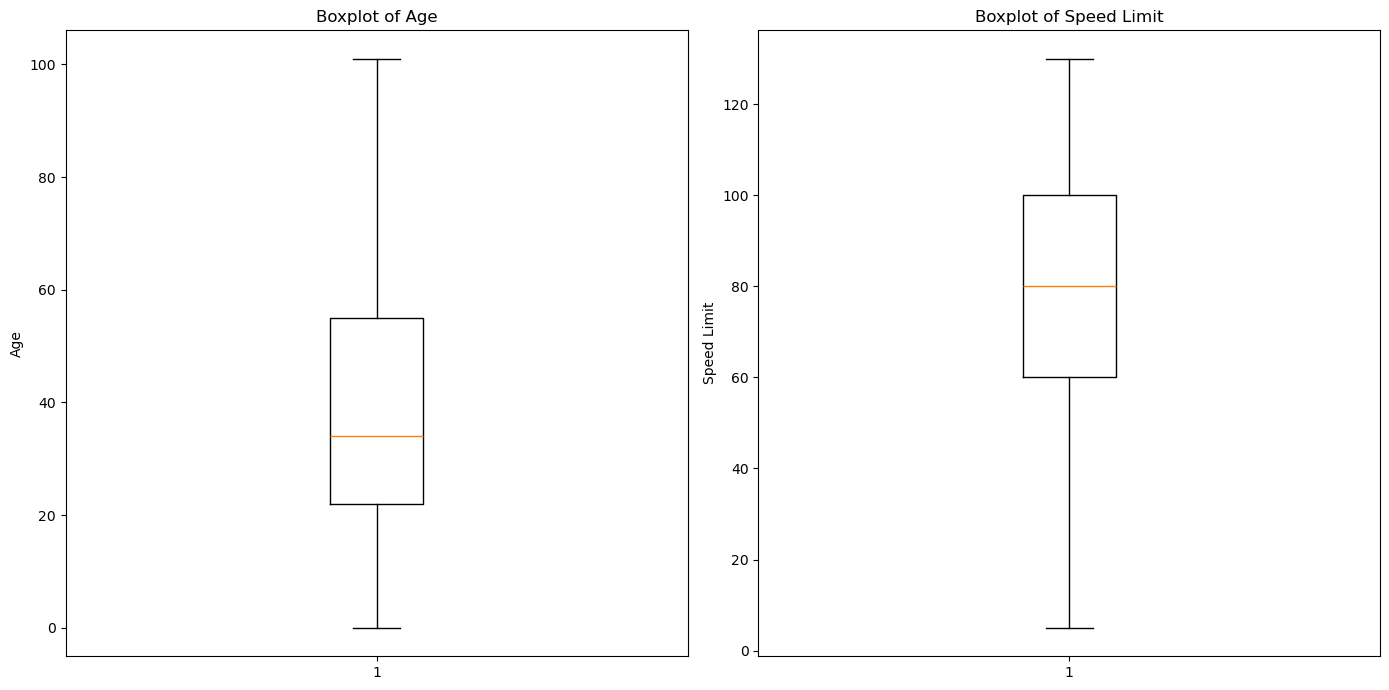

In [85]:
#Usando boxplot para verificar outliers
fig, ax = plt.subplots(1,2,figsize=(14, 7))

ax[0].set_title('Boxplot of Age')
ax[0].set_ylabel('Age')
ax[0].boxplot(df['Age'])

ax[1].set_title('Boxplot of Speed Limit')
ax[1].set_ylabel('Speed Limit')
ax[1].boxplot(df['Speed Limit'])

plt.tight_layout()
plt.show()

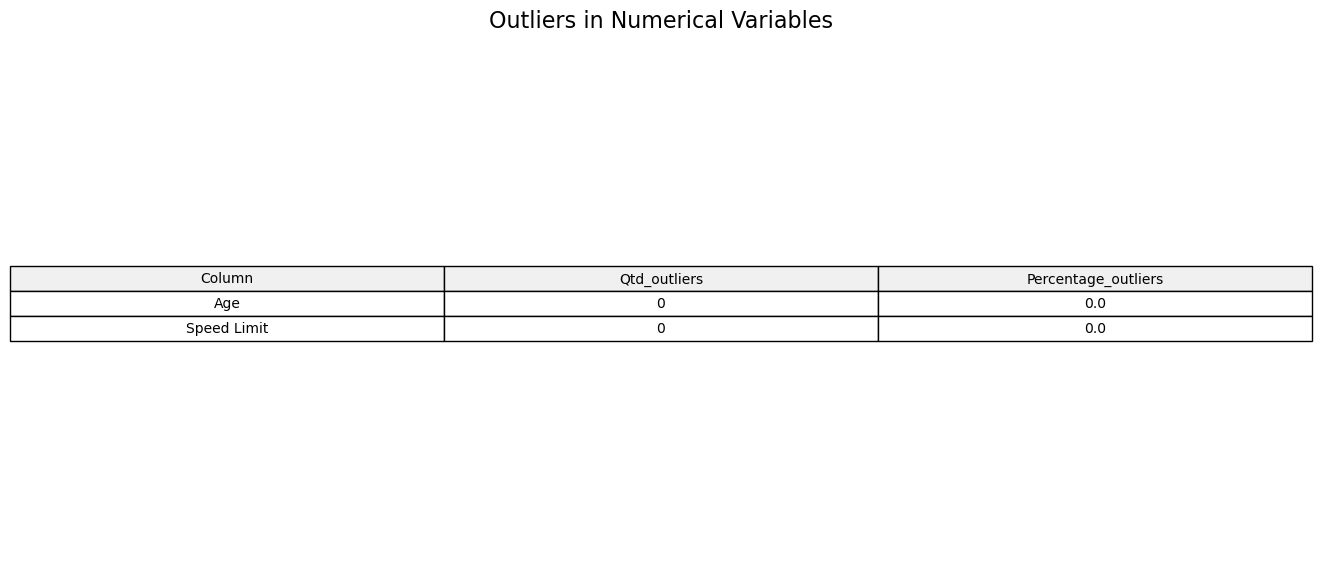

In [86]:
# Contagem de outliers
# Boxplot deixa claro que não existem outliers, mas para questões de prática irei fazer a contagem
df_outliers = df[['Age', 'Speed Limit']]
df_outliers = calculate_outliers(df_outliers)

figure, ax = plt.subplots(figsize=(14, 7))
ax.axis('off')
table = plt.table(
    cellText=df_outliers.values,
    colLabels=df_outliers.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f0f0f0'] * len(df_outliers.columns),
    
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Outliers in Numerical Variables", fontsize=16,pad = 5)
plt.show()

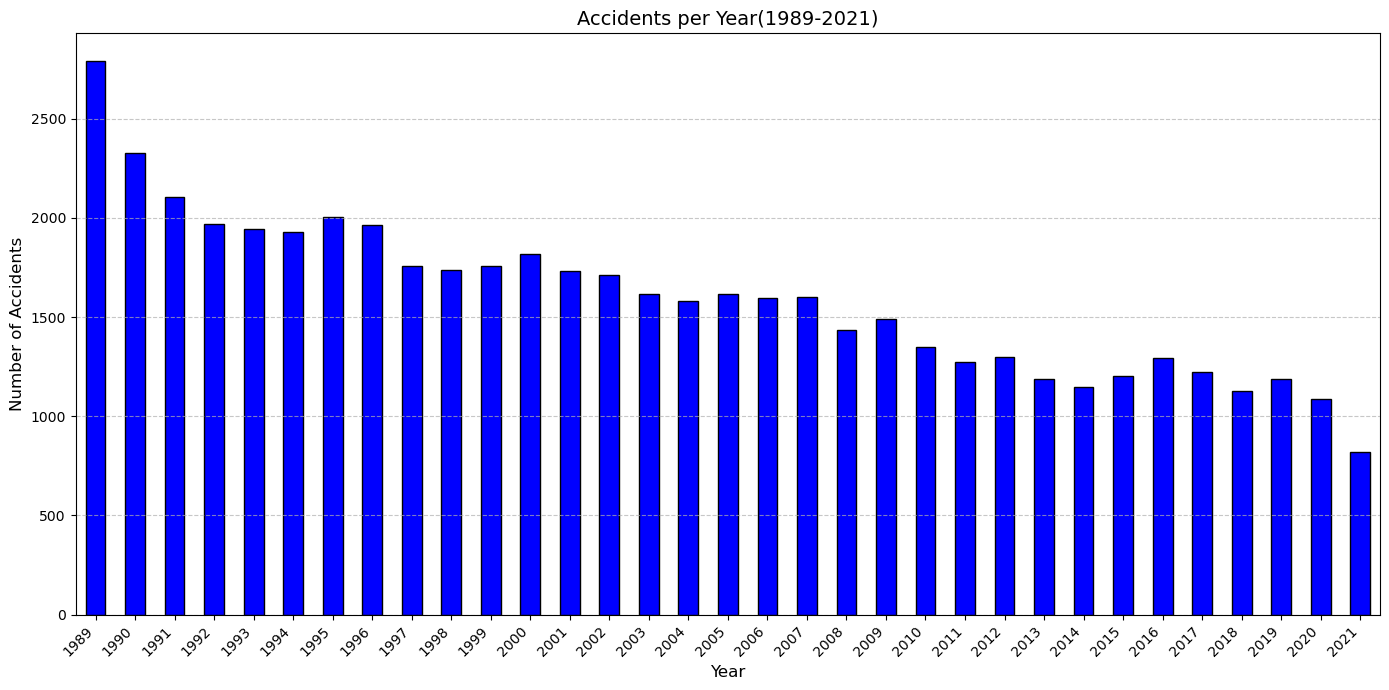

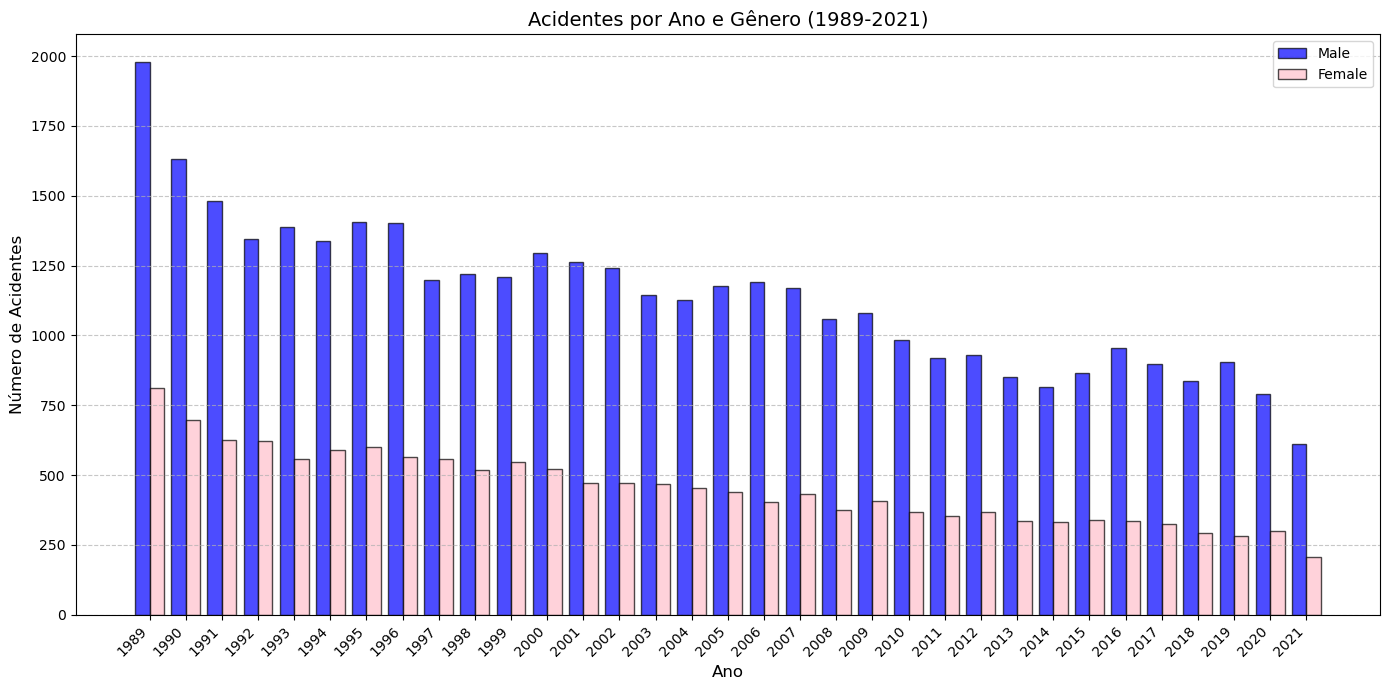

In [87]:
# Verifica os anos existentes no DataFrame
counts = df['Year'].value_counts().sort_index()

# Filtro o periodo de interesse
counts = counts.loc[1989:2021]
# Plotar o gráfico de barras
ax = counts.plot(kind='bar', figsize=(14, 7), edgecolor='black', color='blue')
plt.title("Accidents per Year(1989-2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar layout
plt.show()

male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']
# Verificar relação entre acidentes e sexo
acc_male = male['Year'].value_counts().sort_index().rename('Male')
acc_female = female['Year'].value_counts().sort_index().rename('Female')
acc_by_gender = pd.concat([acc_male, acc_female], axis=1).fillna(0)

plt.figure(figsize=(14, 7))

# Definir posições das barras
years = acc_by_gender.index
bar_width = 0.4

# Barras para homens
plt.bar(
    years - bar_width/2, 
    acc_by_gender['Male'], 
    width=bar_width, 
    color='blue', 
    alpha=0.7, 
    label='Male',
    edgecolor='black'
)

# Barras para mulheres
plt.bar(
    years + bar_width/2, 
    acc_by_gender['Female'], 
    width=bar_width, 
    color='pink', 
    alpha=0.7, 
    label='Female',
    edgecolor='black'
)

plt.title("Acidentes por Ano e Gênero (1989-2021)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)
plt.xticks(years, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

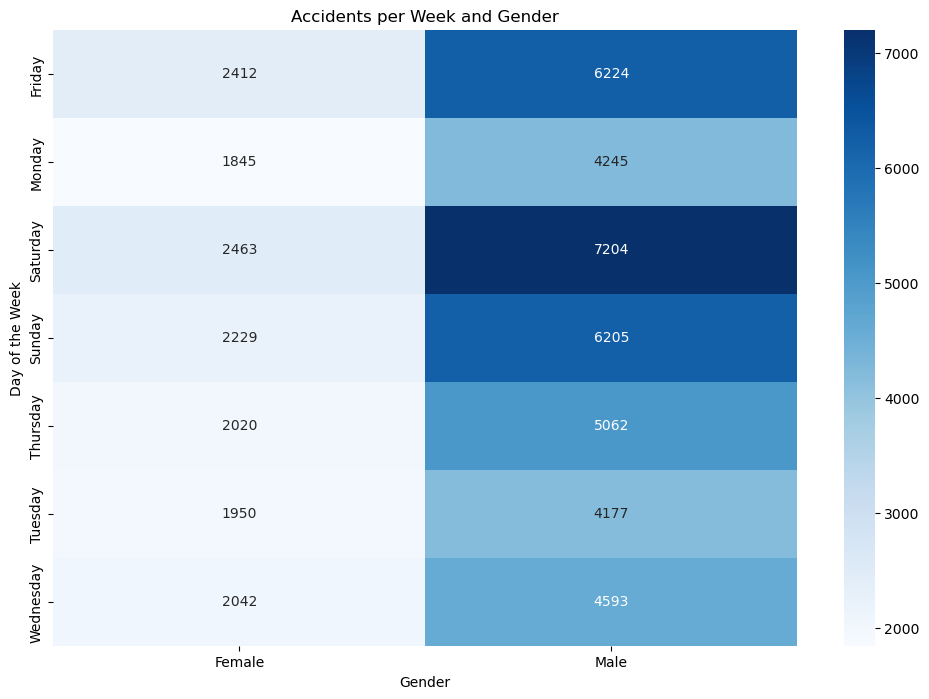

In [88]:
# Garante que o gênero seja apenas masculino ou feminino
filtered_df = df[df['Gender'].isin(['Male', 'Female'])]
# Gera um dataframe relacionando o tipo de acidente e o gênero
cross_table = pd.crosstab(df['Dayweek'], filtered_df['Gender'])
plt.figure(figsize=(12, 8))
# annot -> exibe os valores na tabela
# fmt -> formata os valores exibidos
sns.heatmap(cross_table, annot=True, fmt='d', cmap='Blues')
plt.title("Accidents per Week and Gender")
plt.xlabel("Gender")
plt.ylabel("Day of the Week")
plt.show()


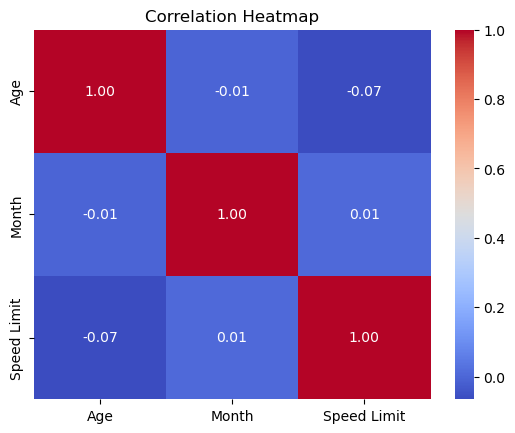

In [89]:
sns.heatmap(df[['Age','Month','Speed Limit']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [90]:
chi2, p_value, dof, expected = chi2_contingency(cross_table)
print(f"Estatística Qui-Quadrado: {chi2:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatística Qui-Quadrado: 122.23
Valor-p: 0.0000
